<a href="https://colab.research.google.com/github/awaaat/Machine_learning-Deep_learning/blob/main/Titanic_survival_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [221]:
import warnings
warnings.filterwarnings("ignore")

#Exploration

In [222]:
import pandas as pd
df20 = pd.read_csv("/content/train.csv")
df20.head()
df20.shape


(8693, 14)

In [223]:
df_test_0 = pd.read_csv("/content/test.csv")
df_test_0.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# New Section

In [224]:
df20.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [225]:
df20.info()
df20.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [226]:
df_test_0 .isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [227]:
print(f"info: {df20.info()}")
print("Full train dataset shape is {}".format(df20.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
info: None
Full train dataset shape is (8693, 14)


In [228]:
df20["HomePlanet"].nunique()

3

In [229]:
#check for duplicates
print(f"duplicates in the dataset: {df20.duplicated().sum()}")


duplicates in the dataset: 0


# Let us first group the columns into categorical and numerical based on their dtypes

In [230]:
categorical_columns = [column for column in df20.columns if df20[column].dtype==object]
non_categorical_columns = [column for column in df20.columns if df20[column].dtype != object]
print(f"cetegorical columns are : {categorical_columns}")
print(f"Non_categorical_columns are : {non_categorical_columns}")

cetegorical columns are : ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']
Non_categorical_columns are : ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']


#Data Cleaning

In [231]:
df21 = df20.copy()
df20.head(3)
df_00 = df21.copy()
df21 = df_00
df20["PassengerId"].shape

(8693,)

In [232]:
#Drop passenger id and name since they would not have any impact on our classification
df21 = df20.drop(columns = ["PassengerId", "Name"], axis = 1)
df21.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [233]:
df_test_0 = df_test_0.drop(columns = ["PassengerId", "Name"], axis = 1)
df_test_0.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [234]:
df_test_0.shape

(4277, 11)

In [235]:
#The remaining features would largely affect our classification results
#Find the null values by percentage
print(f"The null values by percentage are : {(df21.isnull().sum()/df21.shape[0] * 100)}")
#As we can see, the null values are below 2.5 percentage. Let us fugure our how to fill them

The null values by percentage are : HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Transported     0.000000
dtype: float64


In [236]:
df21.head(2)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True


In [237]:
print(f"The null values by percentage are : {(df_test_0.isnull().sum()/df21.shape[0] * 100)}")

The null values by percentage are : HomePlanet      1.000805
CryoSleep       1.069826
Cabin           1.150351
Destination     1.058323
Age             1.046819
VIP             1.069826
RoomService     0.943288
FoodCourt       1.219372
ShoppingMall    1.127344
Spa             1.161854
VRDeck          0.920281
dtype: float64


In [238]:
df21["HomePlanet"].fillna("Unknown", inplace=True)
df21["CryoSleep"].fillna(df21['CryoSleep'].mode()[0], inplace=True)
df21["Cabin"].fillna(df21["Cabin"].mode()[0], inplace=True)
df21["Destination"].fillna(df21["Destination"].mode()[0], inplace=True)
df21["Age"].fillna(df21["Age"].mean(), inplace=True)
df21["VIP"].fillna(df21["VIP"].mode()[0], inplace=True)
df21["RoomService"].fillna(df21["RoomService"].mean(), inplace=True)
df21["FoodCourt"].fillna(df21["FoodCourt"].mean(), inplace=True)
df21["ShoppingMall"].fillna(df21["ShoppingMall"].mean(), inplace=True)
df21["Spa"].fillna(df21["Spa"].mean(),inplace=True)
df21["VRDeck"].fillna(df21["VRDeck"].mean(), inplace=True)


df_test_0["HomePlanet"].fillna("Unknown", inplace=True)
df_test_0["CryoSleep"].fillna(df21['CryoSleep'].mode()[0], inplace=True)
df_test_0["Cabin"].fillna(df21["Cabin"].mode()[0], inplace=True)
df_test_0["Destination"].fillna(df21["Destination"].mode()[0], inplace=True)
df_test_0["Age"].fillna(df21["Age"].mean(), inplace=True)
df_test_0["VIP"].fillna(df21["VIP"].mode()[0], inplace=True)
df_test_0["RoomService"].fillna(df21["RoomService"].mean(), inplace=True)
df_test_0["FoodCourt"].fillna(df21["FoodCourt"].mean(), inplace=True)
df_test_0["ShoppingMall"].fillna(df21["ShoppingMall"].mean(), inplace=True)
df_test_0["Spa"].fillna(df21["Spa"].mean(),inplace=True)
df_test_0["VRDeck"].fillna(df21["VRDeck"].mean(), inplace=True)


print(f"Training Data nulls:\n{df21.isnull().sum()}")
print(f"Testing Data nulls:\n{df_test_0.isnull().sum()}")

Training Data nulls:
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64
Testing Data nulls:
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


In [239]:
df21.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


#Visualizing our data

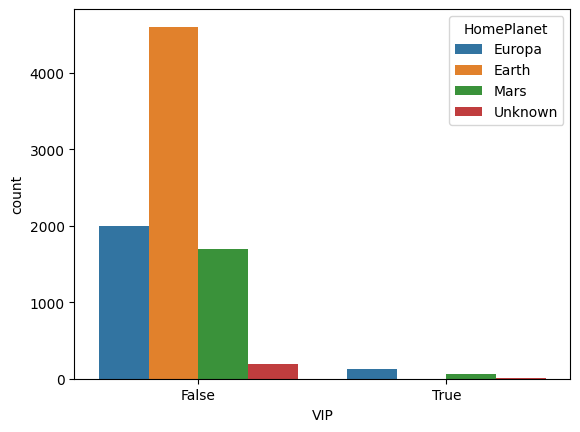

In [240]:
#Relationship between VIP and Homeplanet
import matplotlib.pyplot as plt
import seaborn as sb
sb.countplot(df21, x = "VIP", hue = "HomePlanet")
plt.show()

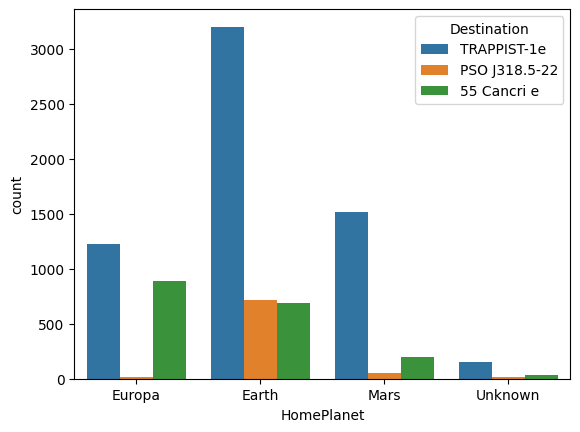

In [241]:
#Well, high number of people are from Europa
#We can also plot the count plot for homeplanet and destination
sb.countplot(df21, x = "HomePlanet", hue = "Destination")
plt.show()

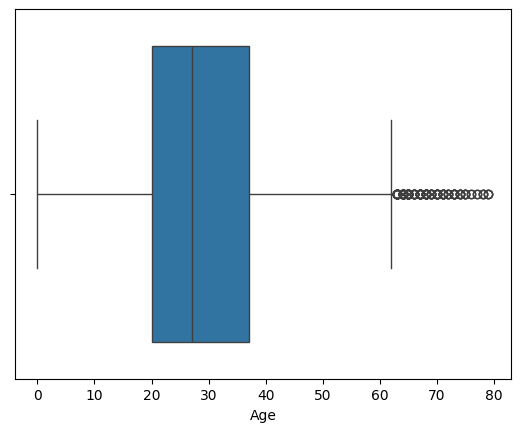

In [242]:
#Check for outliers in the numerical columns, Age
#Plot a boxplot
sb.boxplot(df21["Age"], orient = "h")
plt.show()

#Remove Outliers

In [243]:
import numpy as np
lower_quartile = np.percentile(df21["Age"], 25, interpolation = "midpoint")
upper_quartile = np.percentile(df21["Age"], 75, interpolation = "midpoint")
inter_quartile_range = (upper_quartile - lower_quartile)
mean_age = df21["Age"].mean()
standard_deviation_age = df21["Age"].std()
upper_bound = (mean_age + (upper_quartile + standard_deviation_age))
lower_bound = (mean_age - (lower_quartile - standard_deviation_age))
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
#df21.drop(upper_bound, inplace = True)
print(f"lower_quartile: {lower_quartile}")

Lower bound: 23.16698486960737
Upper bound: 80.16698486960736
lower_quartile: 20.0


In [244]:
#So let us have a new dataframe in which we have no outliers of age

#df22 = df21[(df21["Age"]>= lower_bound) & (df21["Age"]<=upper_bound)]
df21.shape

(8693, 12)

In [245]:
df22 = df21.copy()
df22.head()
df22.shape

(8693, 12)

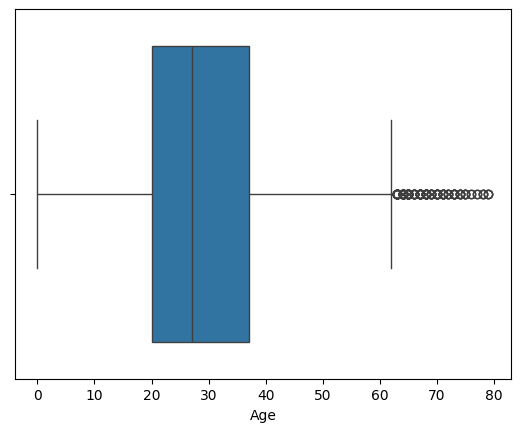

In [246]:
sb.boxplot(df22["Age"], orient = "h")
plt.show()

In [247]:
df22.head(3)
df_22 = df22.copy()

In [248]:
df_22["Cabin"].unique()
#Let us deal with cabin colum
#We can split it and them make columns out of what we have split
New_Cabin = df_22["Cabin"].str.split("/", n = 3, expand = True)
df_22["Cabin_1"] = New_Cabin[0]
df_22["Cabin_2"] = New_Cabin[1].astype(int)
df_22["Cabin_3"] = New_Cabin[2]
df_23 = df_22.drop(columns = "Cabin", axis = 1)
df_23.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_1,Cabin_2,Cabin_3
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [249]:
df_test_0["Cabin"].nunique()
New_Cabin = df_test_0["Cabin"].str.split("/", n = 3, expand = True)
df_test_0["Cabin_1"] = New_Cabin[0]
df_test_0["Cabin_2"] = New_Cabin[1].astype(int)
df_test_0["Cabin_3"] = New_Cabin[2]
df_test_1 = df_test_0.drop(columns = "Cabin", axis = 1)
df_test_1.head()
df_test_1.shape
df_test_0.shape

(4277, 14)

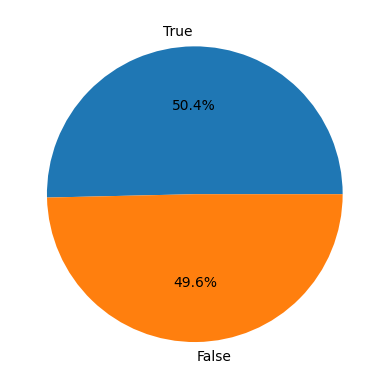

In [250]:
X = df_23["Transported"].value_counts()
plt.pie(df_23['Transported'].value_counts(), labels = X.index, autopct='%1.1f%%')
plt.legend
plt.show()

In [251]:
df_test_0.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_1,Cabin_2,Cabin_3
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S


#Feature Scaling

In [252]:
df_23.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_1,Cabin_2,Cabin_3
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S


In [253]:
df_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Cabin_1       8693 non-null   object 
 12  Cabin_2       8693 non-null   int64  
 13  Cabin_3       8693 non-null   object 
dtypes: bool(3), float64(6), int64(1), object(4)
memory usage: 772.6+ KB


In [254]:
df_23["Cabiin_2"] =  df_23["Cabin_2"].astype(int)
df_23["Cabiin_2"].info()
df_test_1["Cabin_2"] = df_test_1["Cabin_2"].astype(int)

<class 'pandas.core.series.Series'>
RangeIndex: 8693 entries, 0 to 8692
Series name: Cabiin_2
Non-Null Count  Dtype
--------------  -----
8693 non-null   int64
dtypes: int64(1)
memory usage: 68.0 KB


In [255]:
df_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Cabin_1       8693 non-null   object 
 12  Cabin_2       8693 non-null   int64  
 13  Cabin_3       8693 non-null   object 
 14  Cabiin_2      8693 non-null   int64  
dtypes: bool(3), float64(6), int64(2), object(4)
memory usage: 840.6+ KB


In [256]:
#We will do label encording for categorical columns, and then convert to binary those with bolean dtypes

from sklearn.preprocessing import LabelEncoder, StandardScaler
for col in df_23.columns:
  if df_23[col].dtype == object:
    encorder = LabelEncoder()
    df_23[col] = encorder.fit_transform(df_23[col])
  if df_23[col].dtype== bool:
    df_23[col] = df_23[col].astype(int)

In [257]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
for col in df_test_1.columns:
  if df_test_1[col].dtype == object:
    encorder = LabelEncoder()
    df_test_1[col] = encorder.fit_transform(df_test_1[col])
  if df_test_1[col].dtype== bool:
    df_test_1[col] = df_test_1[col].astype(int)

In [258]:
df_23.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_1,Cabin_2,Cabin_3,Cabiin_2
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,0,1,0


In [259]:
df_test_1.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_1,Cabin_2,Cabin_3
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,6,3,1
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,5,4,1
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,2,0,1
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,2,1,1
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,5,5,1


<Axes: >

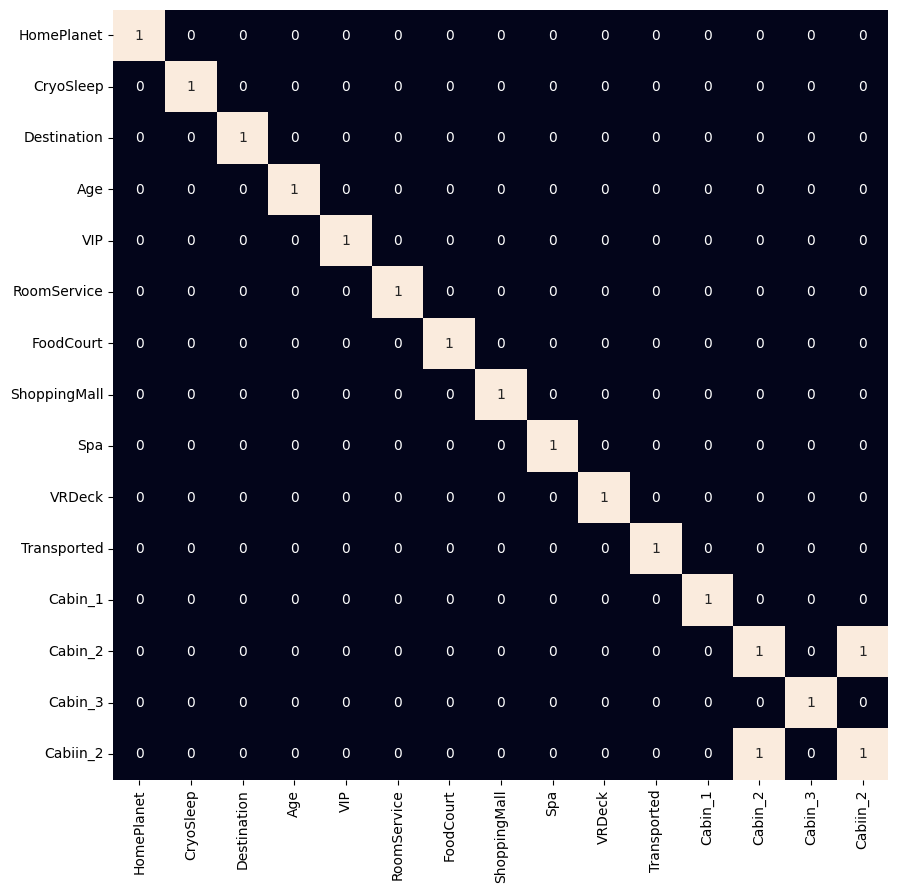

In [260]:
plt.figure(figsize=(10,10))
sb.heatmap(df_23.corr()>0.8,
           annot=True,
           cbar=False)

In [261]:
df_23 = df_23.drop(columns = "Cabiin_2")
df_23.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_1,Cabin_2,Cabin_3
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1,1


#Feature Scaling and Model Selection

In [262]:
from sklearn.model_selection import train_test_split
X_train_set = df_23.drop(columns = "Transported")
y_train = df_23["Transported"]
X_test_set=df_test_1
print(y_train_set[1])
print(X_train_set.shape)
print(y_train_set.shape)

1
(8693, 13)
(8693,)


In [263]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X_train_set)
X_train= pd.DataFrame(scaled_df, columns = X_train_set.columns)
X_train.head()
print(X_train.shape)

(8693, 13)


In [264]:
scaler = StandardScaler()
scaled_test_df = scaler.fit_transform(X_test_set)
X_test = pd.DataFrame(scaled_test_df, columns = X_test_set.columns)
X_test.head()
print(X_test.shape)

(4277, 13)


In [265]:
print(f"X_train: {len(X_train)}")
print(f"y_train: {len(y_train)}")
print(f"X_train_shape: {X_train.shape}")
print(f"y_train_shape: {y_train.shape}")

X_train: 8693
y_train: 8693
X_train_shape: (8693, 13)
y_train_shape: (8693,)


In [266]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
models = [LogisticRegression(), XGBClassifier(), SVC(kernel = "rbf")]
for i in range(3):
  models[i].fit(X_train, y_train)
  print(f"Model: {models[i]}")
  training_predictions = models[i].predict(X_train)
  testing_predictions = models[i].predict(X_test)
  #y_test = cross_val_predict(models[i], X_test)
  cross_validation_scores = cross_val_score(models[i], X_train, y_train, scoring = "accuracy", cv=3)
  print(f"Cross Validation Scores: {cross_validation_scores}")
  precision_scores = precision_score(y_train, training_predictions)
  recall_scores = recall_score(y_train, training_predictions)
  print(f"Precision score: {precision_scores}")
  print(f"Recall Scores: {recall_scores}")
  consusion_matrix_scoreboard = confusion_matrix(y_train, training_predictions)
  print(f"confusion_matrix_scoreboard: {consusion_matrix_scoreboard}")


Model: LogisticRegression()
Cross Validation Scores: [0.77191166 0.78985507 0.7566448 ]
Precision score: 0.7784153608474951
Recall Scores: 0.8056190041114665
consusion_matrix_scoreboard: [[3311 1004]
 [ 851 3527]]
Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Cross Validation Scor

In [267]:
model = models[1] #The XGBClassifier. it performs best
actual_predictions = model.predict(X_train)
for i in actual_predictions:
  if i==0:
    print("No")
  if i==1:
    print("YES")

Streaming output truncated to the last 5000 lines.
YES
No
YES
YES
No
YES
No
YES
YES
YES
YES
No
YES
No
No
No
YES
No
No
No
YES
No
No
No
No
No
No
YES
No
YES
No
YES
No
YES
YES
YES
YES
YES
YES
YES
No
No
No
No
YES
No
YES
YES
YES
YES
No
YES
YES
YES
No
YES
YES
YES
YES
No
No
No
No
No
YES
YES
No
No
No
YES
No
No
No
No
YES
YES
YES
YES
YES
YES
No
YES
YES
No
YES
No
YES
No
YES
YES
No
No
YES
YES
YES
No
No
YES
YES
No
YES
YES
YES
No
YES
No
No
No
No
YES
YES
YES
YES
No
No
YES
No
YES
YES
YES
YES
No
No
YES
No
No
No
No
YES
YES
YES
YES
YES
No
No
No
No
No
No
No
YES
No
No
YES
No
YES
YES
YES
No
YES
YES
YES
No
YES
YES
YES
YES
YES
No
YES
YES
YES
YES
YES
YES
YES
No
No
No
No
YES
No
No
No
YES
YES
No
YES
YES
No
YES
YES
No
No
YES
YES
YES
YES
YES
No
No
No
YES
YES
YES
YES
YES
No
YES
No
No
YES
YES
No
No
No
YES
YES
YES
No
No
YES
YES
YES
YES
No
No
YES
YES
YES
YES
YES
YES
No
YES
No
No
No
No
No
YES
YES
YES
No
No
YES
YES
YES
YES
No
YES
No
YES
No
No
No
YES
YES
YES
No
YES
YES
YES
YES
No
No
No
YES
YES
YES
YES
YES
No
No
No
YES
No


(8693,)